In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from datetime import datetime
%matplotlib inline

In [40]:
yield_data = pd.read_csv('missing_0.3.csv')

In [41]:
yield_data = yield_data.set_index('Unnamed: 0')
yield_data.index.name='Time Period'

In [42]:
yield_data.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year,Day of week,IS_WEEKEND
Time Period,,,,,,,,,,,,,
2009-12-01,0.09,NaN,NaN,0.26,0.67,1.14,NaN,2.74,3.28,4.14,4.26,NaN,0.0
2009-12-02,NaN,NaN,NaN,0.28,NaN,NaN,2.09,2.80,NaN,4.14,4.26,2.0,0.0
2009-12-03,0.09,0.06,NaN,0.30,0.74,1.23,2.14,2.87,3.39,4.23,NaN,NaN,NaN
2009-12-04,NaN,NaN,0.17,0.36,NaN,1.34,2.24,2.97,3.48,4.31,NaN,4.0,0.0
2009-12-07,NaN,0.04,NaN,0.32,0.78,1.26,2.19,2.92,3.44,NaN,4.40,0.0,0.0


In [43]:
yield_data = yield_data.iloc[:,0:11] #get rid of day of week and is weekend
yield_data_filtered = yield_data

In [44]:
yield_data_filtered.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Time Period,,,,,,,,,,,
2009-12-01,0.09,NaN,NaN,0.26,0.67,1.14,NaN,2.74,3.28,4.14,4.26
2009-12-02,NaN,NaN,NaN,0.28,NaN,NaN,2.09,2.80,NaN,4.14,4.26
2009-12-03,0.09,0.06,NaN,0.30,0.74,1.23,2.14,2.87,3.39,4.23,NaN
2009-12-04,NaN,NaN,0.17,0.36,NaN,1.34,2.24,2.97,3.48,4.31,NaN
2009-12-07,NaN,0.04,NaN,0.32,0.78,1.26,2.19,2.92,3.44,NaN,4.40


In [45]:
def rolling_method(df,col,window):
    method = ['mean','std','median','min','max']
    a = df[col].rolling(window=window, min_periods = 1)
    b = pd.concat([getattr(a,k)() for k in method],axis=1)
    b.columns  = method
    #b['RMS'] = a.apply(lambda y: np.sqrt(np.mean(y**2)))
    #b['crest'] = 0.5*(b['max']-b['min'])/b['RMS']
    #b['crossing'] = a.apply(lambda y: len(np.where(np.diff(y - np.mean(y)))[0]))/window
    #b['slope'] = a.apply(lambda y: linregress(range(window),y)[0])
    b.columns = [col + '_'+ k +'_'+str(window)+'day' 
                 for k in ['mean','std','median','min','max'#,'RMS','crest','crossing','slope'
                          ]]
    return b

In [46]:
yield_data_features=pd.concat([rolling_method(yield_data_filtered,i,j) \
                               for i in yield_data_filtered.columns[:11] \
                               for j in [3,7,15,20]],axis=1).shift(11) 
# 11 beacuse first shift 1 and then shift 10 as rolling window of 20 from 10th to 30th day
yield_data_features.head(10)

,1-month_mean_3day,1-month_std_3day,1-month_median_3day,1-month_min_3day,1-month_max_3day,1-month_mean_7day,1-month_std_7day,1-month_median_7day,1-month_min_7day,1-month_max_7day,...,30-year_mean_15day,30-year_std_15day,30-year_median_15day,30-year_min_15day,30-year_max_15day,30-year_mean_20day,30-year_std_20day,30-year_median_20day,30-year_min_20day,30-year_max_20day
Time Period,,,,,,,,,,,,,,,,,,,,,
2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
yield_data_features=pd.concat([yield_data_features,yield_data],axis=1)
#yield_data_features.dropna(axis=0,how='any',inplace=True)
yield_data_features.head()
for i in range(1,11):
    temp=yield_data_features[[col for col in yield_data_filtered.columns]].shift(i)
    temp.columns=[j+'_'+str(i) for j in list(temp.columns)]
    yield_data_features=pd.concat([yield_data_features,temp],axis=1)
yield_data_features = yield_data_features.fillna(method='ffill')
yield_data_features = yield_data_features[yield_data_features.index>='2010-01-14']
yield_data_features.head()

,1-month_mean_3day,1-month_std_3day,1-month_median_3day,1-month_min_3day,1-month_max_3day,1-month_mean_7day,1-month_std_7day,1-month_median_7day,1-month_min_7day,1-month_max_7day,...,3-month_10,6-month_10,1-year_10,2-year_10,3-year_10,5-year_10,7-year_10,10-year_10,20-year_10,30-year_10
Time Period,,,,,,,,,,,,,,,,,,,,,
2010-01-14,0.020,0.000000,0.020,0.02,0.02,0.0140,0.005477,0.01,0.01,0.02,...,0.05,0.19,0.47,1.08,1.65,2.61,3.34,3.80,4.54,4.61
2010-01-15,0.020,0.000000,0.020,0.02,0.02,0.0160,0.005477,0.02,0.01,0.02,...,0.06,0.20,0.47,1.14,1.70,2.69,3.39,3.85,4.58,4.63
2010-01-19,0.020,0.000000,0.020,0.02,0.02,0.0175,0.005000,0.02,0.01,0.02,...,0.08,0.18,0.45,1.14,1.70,2.65,3.36,3.85,4.60,4.63
2010-01-20,0.035,0.021213,0.035,0.02,0.05,0.0240,0.015166,0.02,0.01,0.05,...,0.08,0.17,0.41,1.14,1.70,2.65,3.28,3.77,4.54,4.59
2010-01-21,0.040,0.014142,0.040,0.03,0.05,0.0280,0.013038,0.02,0.02,0.05,...,0.06,0.15,0.41,1.01,1.60,2.60,3.28,3.85,4.63,4.70


In [48]:
yield_data_features = yield_data_features[yield_data_features.index>'2010-05-11']

In [49]:
yield_data_features.head()

,1-month_mean_3day,1-month_std_3day,1-month_median_3day,1-month_min_3day,1-month_max_3day,1-month_mean_7day,1-month_std_7day,1-month_median_7day,1-month_min_7day,1-month_max_7day,...,3-month_10,6-month_10,1-year_10,2-year_10,3-year_10,5-year_10,7-year_10,10-year_10,20-year_10,30-year_10
Time Period,,,,,,,,,,,,,,,,,,,,,
2010-05-12,0.140,1.095171e-09,0.140,0.14,0.14,0.144000,0.005477,0.14,0.14,0.15,...,0.16,0.24,0.430000,1.030000,1.56357,2.597937,3.230000,3.800000,4.470000,4.630000
2010-05-13,0.140,1.548805e-09,0.140,0.14,0.14,0.142500,0.005000,0.14,0.14,0.15,...,0.17,0.23,0.420000,0.998559,1.58000,2.514644,3.190000,3.745087,4.470298,4.600000
2010-05-14,0.145,7.071072e-03,0.145,0.14,0.15,0.144000,0.005477,0.14,0.14,0.15,...,0.16,0.25,0.418369,0.970000,1.51000,2.430000,3.174928,3.690000,4.470384,4.530000
2010-05-17,0.145,7.071072e-03,0.145,0.14,0.15,0.143333,0.005164,0.14,0.14,0.15,...,0.17,0.25,0.418677,1.000000,1.50006,2.470000,3.160000,3.720000,4.373032,4.530000
2010-05-18,0.145,7.071072e-03,0.145,0.14,0.15,0.142000,0.004472,0.14,0.14,0.15,...,0.17,0.25,0.404478,0.960000,1.49000,2.380000,3.083158,3.630000,4.270000,4.464013


In [50]:
def predictTargetNew(target):
    print("******predicting:",target,"*******")
    Y=yield_data_features[[target]]
    X=yield_data_features.drop(target,axis=1)
    print("Shapeof Y:",Y.shape)
    print("Shapeof X:",X.shape)
    X_train=X[X.index < '2017-07-01']
    X_test=X[X.index >= '2017-07-01']
    y_train=Y[Y.index < '2017-07-01']
    y_test=Y[Y.index  >= '2017-07-01']
    print("Shapeof Y_train:",y_train.shape)
    print("Shapeof X_train:",X_train.shape)
    print("Shapeof Y_test:",y_test.shape)
    print("Shapeof X_test:",X_test.shape)
    max_depth = 30
    regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
    regr_rf.fit(X_train, y_train)
    # Predict on new data
    y_rf = pd.DataFrame(regr_rf.predict(X_test))
    y_rf.index=y_test.index
    y_rf.columns=y_test.columns
    #score
    print(target," R sq:",r2_score(y_test,y_rf))
    print(target," RMSE:",np.sqrt(mean_squared_error(y_test,y_rf)))
    final=pd.DataFrame()
    final['Time']=y_test.index
    final.index=y_test.index
    final['true']=y_test[target]
    final['pred']=y_rf[target]
    plt.figure(figsize=(8, 6))
    s = 25
    a = 0.4
    plt.figure(figsize=(8,3))
    x_axis=range(len(final))
    plt.scatter(x_axis, final['true'], edgecolor='k',
                c="navy", s=s, alpha=a, label="Data")
    plt.scatter(x_axis, final['pred'], edgecolor='k',
                c="c", s=s, alpha=a,
                label="RF (R2score={:.2f} \n RMSE={:.2f})".format(regr_rf.score(X_test, y_test),np.sqrt(mean_squared_error(y_test,y_rf))))
    plt.xticks(x_axis, final['Time'].dt.date, rotation='vertical')
    plt.xlabel("date")
    plt.ylabel(target+" yield")
    plt.gca().margins(x=0)
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

In [55]:
yield_data_features.index = pd.to_datetime(yield_data_features.index)

******predicting: 1-month *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1-month  R sq: -8.83387305592
1-month  RMSE: 0.147653034795


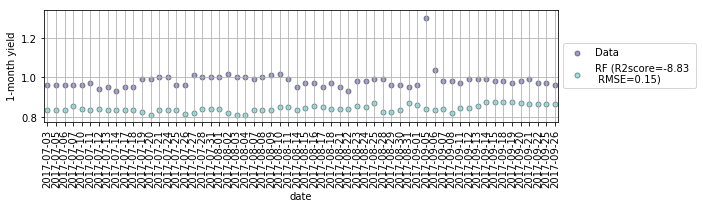

******predicting: 3-month *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3-month  R sq: -1.85989785421
3-month  RMSE: 0.0676002940997


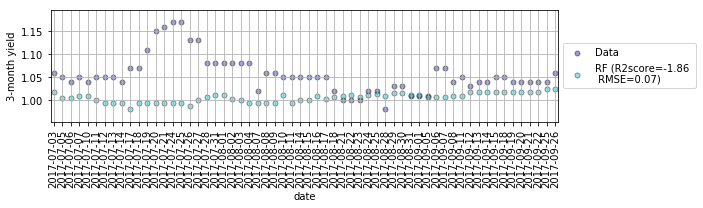

******predicting: 6-month *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6-month  R sq: -1.84899456142
6-month  RMSE: 0.0430873024246


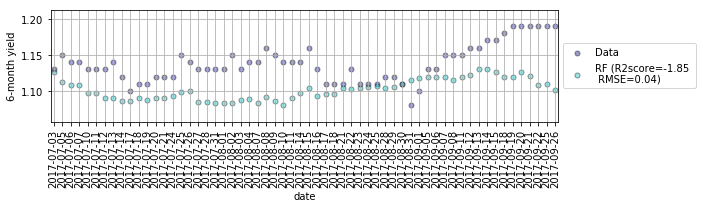

******predicting: 1-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1-year  R sq: -1.8821370162
1-year  RMSE: 0.051026298318


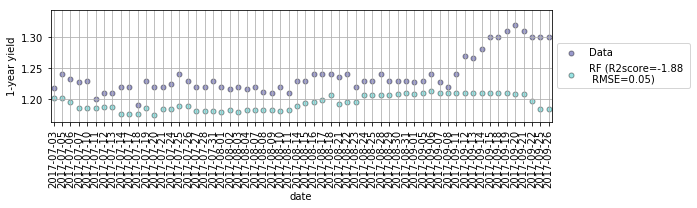

******predicting: 2-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2-year  R sq: 0.0413815757307
2-year  RMSE: 0.039862237384


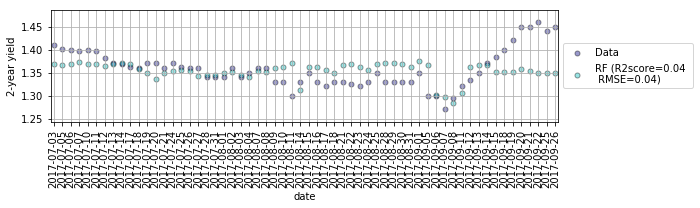

******predicting: 3-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3-year  R sq: 0.654477030118
3-year  RMSE: 0.0288265964663


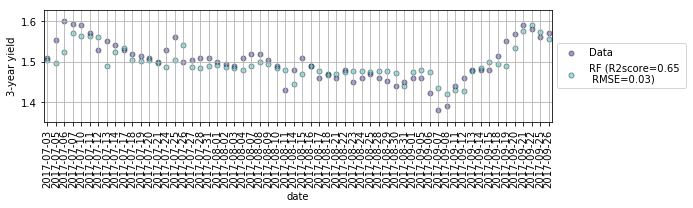

******predicting: 5-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5-year  R sq: 0.764793959335
5-year  RMSE: 0.0351948009714


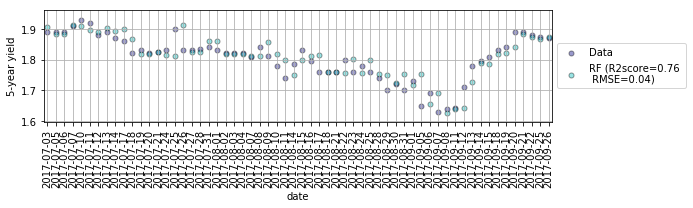

******predicting: 7-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7-year  R sq: 0.829706238174
7-year  RMSE: 0.0305475137817


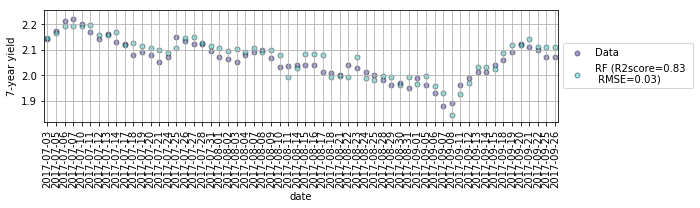

******predicting: 10-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


10-year  R sq: 0.833840141458
10-year  RMSE: 0.0319236358776


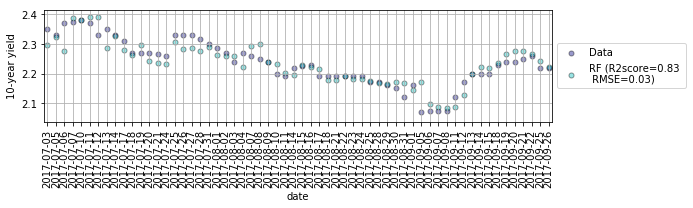

******predicting: 20-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


20-year  R sq: 0.849326443721
20-year  RMSE: 0.0268900217692


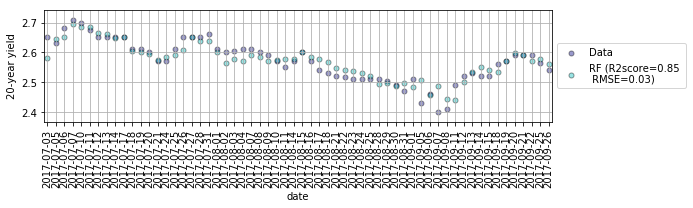

******predicting: 30-year *******
Shapeof Y: (1847, 1)
Shapeof X: (1847, 340)
Shapeof Y_train: (1787, 1)
Shapeof X_train: (1787, 340)
Shapeof Y_test: (60, 1)
Shapeof X_test: (60, 340)


D:\anaconda_py3\python3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


30-year  R sq: 0.669928021704
30-year  RMSE: 0.0353885485884


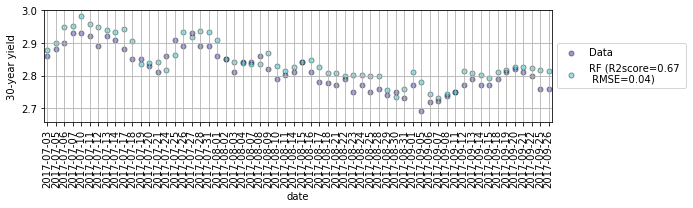

In [56]:
for target in ['1-month', '3-month', '6-month', '1-year', '2-year', '3-year', '5-year','7-year', '10-year', '20-year', '30-year']:
    predictTargetNew(target)